In [1]:
## Aryan Varshney - 101903605 & Kanishk Chawla - 101903578
## ML Project
## Submitted To :- Dr.Joohi Chauhan Mam

In [9]:
#Importing all the required libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import folium 
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans

In [10]:
df = pd.read_csv('data/complete_dataset.csv')

In [11]:
df.head(10)

,Unnamed: 0,Borough,Neighborhoods,Latitude,Longitude,Population,City,AverageIncome
0,0,Central,Cantonment area,12.972442,77.580643,866377,Bangalore,18944.099792
1,1,Central,Domlur,12.960992,77.638726,743186,Bangalore,56837.022198
2,2,Central,Indiranagar,12.971891,77.641151,474289,Bangalore,41991.817435
3,3,Central,Jeevanbheemanagar,12.962900,77.659500,527874,Bangalore,6667.447632
4,4,Central,Malleswaram,13.003100,77.564300,893629,Bangalore,53270.063892
5,5,Central,Pete area,12.962700,77.575800,730999,Bangalore,50712.430215
6,6,Central,Rajajinagar,12.990100,77.552500,981362,Bangalore,60967.535874
7,7,Central,Sadashivanagar,13.006800,77.581300,662625,Bangalore,59943.541564
8,8,Central,Seshadripuram,12.993500,77.578700,396862,Bangalore,58407.090338
9,9,Central,Shivajinagar,12.985700,77.605700,77836,Bangalore,55850.962099


In [12]:
df.drop('Unnamed: 0',axis=1,inplace=True)

Creating 'Population' and 'Income' dataframe from the main dataframe

In [13]:
bangalore_population = pd.DataFrame(df[['Borough','Neighborhoods','Population']])

In [14]:
bangalore_population.head()

,Borough,Neighborhoods,Population
0,Central,Cantonment area,866377
1,Central,Domlur,743186
2,Central,Indiranagar,474289
3,Central,Jeevanbheemanagar,527874
4,Central,Malleswaram,893629


In [15]:
bangalore_population.to_csv('data/population_dataset.csv')

In [16]:
bangalore_income = pd.DataFrame(df[['Borough','Neighborhoods','AverageIncome']])

In [17]:
bangalore_income.head()

,Borough,Neighborhoods,AverageIncome
0,Central,Cantonment area,18944.099792
1,Central,Domlur,56837.022198
2,Central,Indiranagar,41991.817435
3,Central,Jeevanbheemanagar,6667.447632
4,Central,Malleswaram,53270.063892


In [18]:
bangalore_income.to_csv('data/income_dataset.csv')

In [19]:
bangalore_latitude = df['Latitude'].mean()
bangalore_longitude = df['Longitude'].mean()
print("Latitude and Longitude of Bangalore are : ",bangalore_latitude,bangalore_longitude)

Latitude and Longitude of Bangalore are :  12.9623396203125 77.601752946875


In [20]:
CLIENT_ID = 'ZK40VO3EPO1ZY5C04PNYSMQH2ZFZ3U1TPL0QME3WEY553DMH'
CLIENT_SECRET = 'RQBRNE2T3OTMYY4BBJ3YWLS0P2FK413O22MQV1QHBHAD04WG'
VERSION = '20180606'
LIMIT = 150

In [21]:
unique_boroughs_of_bangalore = df['Borough'].unique().tolist()

In [22]:
unique_boroughs_of_bangalore

['Central',
 'Eastern',
 'NorthEastern',
 'Northern',
 'SouthEastern',
 'Southern',
 'SouthernSuburbs',
 'Western']

In [23]:
borough_colors ={}
for i in unique_boroughs_of_bangalore:
    borough_colors[i] = '#%02X%02X%02X' % tuple(np.random.choice(range(256),size=3))

In [24]:
borough_colors

{'Central': '#AFBFBB',
 'Eastern': '#1295C1',
 'NorthEastern': '#A075EE',
 'Northern': '#520893',
 'SouthEastern': '#992CF3',
 'Southern': '#C4E89B',
 'SouthernSuburbs': '#D693C3',
 'Western': '#D8B3F2'}

In [25]:
bangalore_map = folium.Map(location=[bangalore_latitude,bangalore_longitude],zoom_start=12,control_scale=True)

In [26]:
for lat,lng,boro,nei in zip(df['Latitude'],
                           df['Longitude'],
                           df['Borough'],
                           df['Neighborhoods']):
    label_text = boro + ' - ' + nei
    label = folium.Popup(label_text,parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    tooltip = label_text,
    radius = 4,
    popup = label,
    color=borough_colors[boro],
    fill=True,
    fill_color = borough_colors[boro],
    fill_opacity=0.7).add_to(bangalore_map)

In [27]:
bangalore_map

# Exploring bangalore Neighborhoods using FourSquare API

In [28]:
def getNearbyVenues(names, boro, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, boro, lat, lng in zip(names, boro, latitudes, longitudes):
        print("Fetching venues for : ",name)            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            boro,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                             'Borough',
                             'Neighborhood Latitude', 
                             'Neighborhood Longitude', 
                             'Venue', 
                             'Venue Latitude', 
                             'Venue Longitude', 
                             'Venue Category']
    
    return(nearby_venues)

In [29]:
bangalore_venues = getNearbyVenues(names=df['Neighborhoods'],latitudes=df['Latitude'],longitudes=df['Longitude'],boro=df['Borough'])

Fetching venues for :  Cantonment area
Fetching venues for :  Domlur
Fetching venues for :  Indiranagar
Fetching venues for :  Jeevanbheemanagar
Fetching venues for :  Malleswaram
Fetching venues for :  Pete area
Fetching venues for :  Rajajinagar
Fetching venues for :  Sadashivanagar
Fetching venues for :  Seshadripuram
Fetching venues for :  Shivajinagar
Fetching venues for :  Ulsoor
Fetching venues for :  Vasanth Nagar
Fetching venues for :  Bellandur
Fetching venues for :  CV Raman Nagar
Fetching venues for :  Hoodi
Fetching venues for :  Krishnarajapuram
Fetching venues for :  Mahadevapura
Fetching venues for :  Marathahalli
Fetching venues for :  Varthur
Fetching venues for :  Whitefield
Fetching venues for :  Banaswadi
Fetching venues for :  HBR Layout
Fetching venues for :  Horamavu
Fetching venues for :  Kammanahalli
Fetching venues for :  Lingarajapuram
Fetching venues for :  Ramamurthy Nagar
Fetching venues for :  Hebbal
Fetching venues for :  Jalahalli
Fetching venues for :

In [30]:
print("Total number of venues found in Bangalore are : ",bangalore_venues.shape[0])

Total number of venues found in Bangalore are :  596


In [31]:
bangalore_venues.head(5)

,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Cantonment area,Central,12.972442,77.580643,Hotel Fishland,12.975569,77.578592,Seafood Restaurant
1,Cantonment area,Central,12.972442,77.580643,Vasudev Adigas,12.973707,77.579257,Indian Restaurant
2,Cantonment area,Central,12.972442,77.580643,Subway,12.971553,77.579357,Sandwich Place
3,Cantonment area,Central,12.972442,77.580643,Adigas Hotel,12.973554,77.579161,Restaurant
4,Cantonment area,Central,12.972442,77.580643,Kamat Yatrinivas,12.975985,77.578125,Indian Restaurant


In [32]:
bangalore_venues.groupby('Venue Category').count()['Neighborhood'].sort_values(ascending=False).head(10)

Venue Category
Indian Restaurant       114
Café                     32
Fast Food Restaurant     26
Bakery                   24
Department Store         20
Ice Cream Shop           19
Pizza Place              19
Chinese Restaurant       16
Coffee Shop              15
Hotel                    12
Name: Neighborhood, dtype: int64

In [26]:
print("Total number of unique categories in bangalore are : ",len(bangalore_venues['Venue Category'].unique()))

Total number of unique categories in bangalore are :  128


### Getting number of venues per neighborhood

In [27]:
individual_bangalore_venue_count = bangalore_venues.groupby(['Borough','Neighborhood'])['Borough'].count().to_frame()

In [28]:
individual_bangalore_venue_count

Borough
Borough Neighborhood                 
Central Cantonment area             5
        Domlur                     11
        Indiranagar                57
        Jeevanbheemanagar           5
        Malleswaram                 7
...                               ...
Western Nagarbhavi                  9
        Nandini Layout              1
        Nayandahalli                4
        Rajarajeshwari Nagar        7
        Vijayanagar                 4

[63 rows x 1 columns]

In [29]:
individual_bangalore_venue_count.rename(columns={'Borough':'NumberOfVenues'},inplace=True)

In [30]:
individual_bangalore_venue_count.reset_index(inplace=True)

In [31]:
individual_bangalore_venue_count

,Borough,Neighborhood,NumberOfVenues
0,Central,Cantonment area,5
1,Central,Domlur,11
2,Central,Indiranagar,57
3,Central,Jeevanbheemanagar,5
4,Central,Malleswaram,7
...,...,...,...
58,Western,Nagarbhavi,9
59,Western,Nandini Layout,1
60,Western,Nayandahalli,4
61,Western,Rajarajeshwari Nagar,7


[Text(0, 0, 'Cantonment area'),
 Text(1, 0, 'Domlur'),
 Text(2, 0, 'Indiranagar'),
 Text(3, 0, 'Jeevanbheemanagar'),
 Text(4, 0, 'Malleswaram'),
 Text(5, 0, 'Pete area'),
 Text(6, 0, 'Rajajinagar'),
 Text(7, 0, 'Sadashivanagar'),
 Text(8, 0, 'Seshadripuram'),
 Text(9, 0, 'Shivajinagar'),
 Text(10, 0, 'Ulsoor'),
 Text(11, 0, 'Vasanth Nagar'),
 Text(12, 0, 'Bellandur'),
 Text(13, 0, 'CV Raman Nagar'),
 Text(14, 0, 'Hoodi'),
 Text(15, 0, 'Krishnarajapuram'),
 Text(16, 0, 'Mahadevapura'),
 Text(17, 0, 'Marathahalli'),
 Text(18, 0, 'Varthur'),
 Text(19, 0, 'Whitefield'),
 Text(20, 0, 'Banaswadi'),
 Text(21, 0, 'HBR Layout'),
 Text(22, 0, 'Horamavu'),
 Text(23, 0, 'Kammanahalli'),
 Text(24, 0, 'Lingarajapuram'),
 Text(25, 0, 'Ramamurthy Nagar'),
 Text(26, 0, 'Hebbal'),
 Text(27, 0, 'Jalahalli'),
 Text(28, 0, 'Mathikere'),
 Text(29, 0, 'Peenya'),
 Text(30, 0, 'R. T. Nagar'),
 Text(31, 0, 'Vidyaranyapura'),
 Text(32, 0, 'Yelahanka'),
 Text(33, 0, 'Yeshwanthpur'),
 Text(34, 0, 'BTM Layout'),
 T

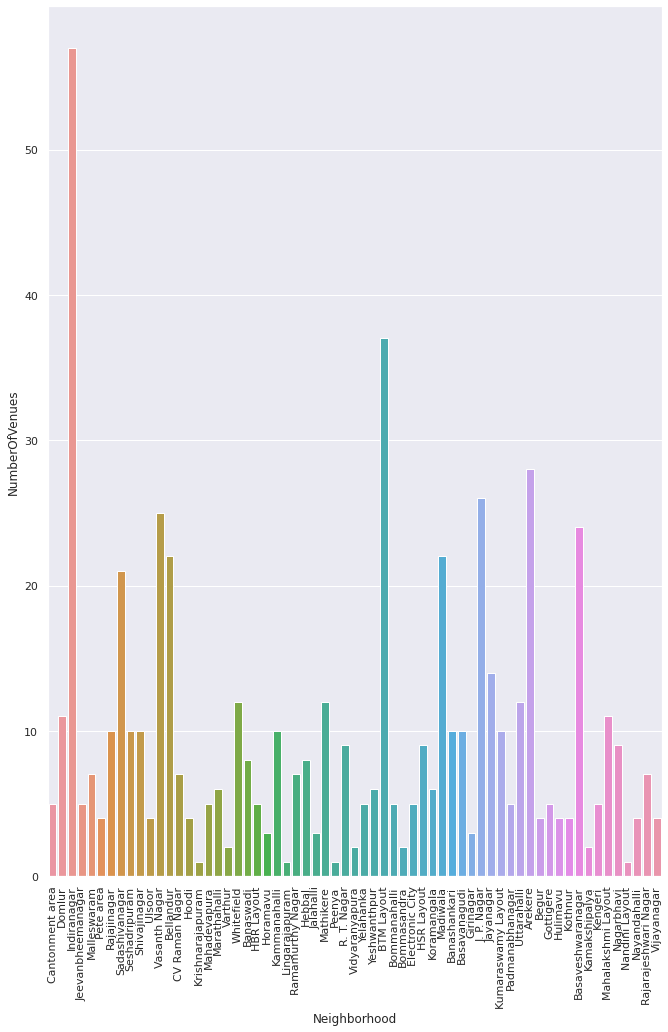

In [32]:
sns.set(rc={'figure.figsize':(11,16)})
plot = sns.barplot(x='Neighborhood',y='NumberOfVenues',data=individual_bangalore_venue_count)
plot.set_xticklabels(individual_bangalore_venue_count['Neighborhood'],rotation=90)

From the above graph we can see that inderanagar has most number of venues and soo on...

## Exploring Whitefield venues

In [33]:
bangalore_venues[bangalore_venues['Neighborhood']=='Whitefield']

,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
216,Whitefield,Eastern,12.9698,77.7499,Golds Gym,12.972217,77.750529,Gym / Fitness Center
217,Whitefield,Eastern,12.9698,77.7499,Herbs and Spices,12.968145,77.750862,Eastern European Restaurant
218,Whitefield,Eastern,12.9698,77.7499,Chef Baker's,12.969730,77.751302,Bakery
219,Whitefield,Eastern,12.9698,77.7499,Royal Orchid Suites,12.966774,77.751262,Hotel
220,Whitefield,Eastern,12.9698,77.7499,The river side bar and kitchen,12.967298,77.749614,Hotel Bar
221,Whitefield,Eastern,12.9698,77.7499,Punjabi Kitchen,12.968100,77.749804,Diner
222,Whitefield,Eastern,12.9698,77.7499,Stoner,12.968464,77.749499,Ice Cream Shop
223,Whitefield,Eastern,12.9698,77.7499,Cult - The Workout Station Whitefield,12.968434,77.749597,Gym / Fitness Center
224,Whitefield,Eastern,12.9698,77.7499,Cheenavala,12.966435,77.749368,Kerala Restaurant
225,Whitefield,Eastern,12.9698,77.7499,Fabindia,12.972156,77.750447,Market


# One hot encoding for letting us to compare different venues based on some common scale


In [34]:
bangalore_venues_onehot = pd.get_dummies(bangalore_venues[['Venue Category']])

In [35]:
bangalore_venues_onehot

,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,Venue Category_Bakery,...,Venue Category_Swiss Restaurant,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
592,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
593,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
594,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
bangalore_venues_onehot['Neighborhood'] = bangalore_venues['Neighborhood']
bangalore_venues_grouped = bangalore_venues_onehot.groupby('Neighborhood').mean().reset_index()
bangalore_venues_grouped

,Neighborhood,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,...,Venue Category_Swiss Restaurant,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store
0,Arekere,0.0,0.0,0.0,0.00,0.0,0.035714,0.0,0.0,0.035714,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,BTM Layout,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.054054,0.0,0.0
2,Banashankari,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,Banaswadi,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.125000,0.0,0.0
4,Basavanagudi,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,Vidyaranyapura,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
59,Vijayanagar,0.0,0.0,0.0,0.25,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
60,Whitefield,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.000000,...,0.083333,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
61,Yelahanka,0.4,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.2,0.0,0.0,0.000000,0.0,0.0


In [37]:
number_of_top_venues = 5

In [38]:
for hood in bangalore_venues_grouped['Neighborhood']:
    print('---------',hood,'---------')
    temp = bangalore_venues_grouped[bangalore_venues_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['Venue','Frequency']
    temp = temp.iloc[1:]
    temp['Frequency'] = temp['Frequency'].astype(float)
    temp = temp.round({'Frequency': 2})
    print(temp.sort_values('Frequency', ascending=False).reset_index(drop=True).head(number_of_top_venues))
    print('\n')

--------- Arekere ---------
                                Venue  Frequency
0    Venue Category_Indian Restaurant       0.18
1  Venue Category_Sporting Goods Shop       0.14
2     Venue Category_Department Store       0.11
3          Venue Category_Pizza Place       0.07
4          Venue Category_Supermarket       0.04


--------- BTM Layout ---------
                                 Venue  Frequency
0     Venue Category_Indian Restaurant       0.19
1    Venue Category_Chinese Restaurant       0.11
2           Venue Category_Snack Place       0.08
3  Venue Category_Fast Food Restaurant       0.08
4        Venue Category_Ice Cream Shop       0.08


--------- Banashankari ---------
                              Venue  Frequency
0               Venue Category_Café        0.2
1  Venue Category_Indian Restaurant        0.1
2        Venue Category_Men's Store        0.1
3               Venue Category_Park        0.1
4     Venue Category_Clothing Store        0.1


--------- Banaswadi ------

--------- Yelahanka ---------
                              Venue  Frequency
0                Venue Category_ATM        0.4
1      Venue Category_Train Station        0.2
2         Venue Category_Smoke Shop        0.2
3  Venue Category_Indian Restaurant        0.2
4   Venue Category_Udupi Restaurant        0.0


--------- Yeshwanthpur ---------
                                     Venue  Frequency
0                       Venue Category_Bar       0.17
1  Venue Category_Mediterranean Restaurant       0.17
2                     Venue Category_Hotel       0.17
3                Venue Category_Restaurant       0.17
4        Venue Category_Seafood Restaurant       0.17




Frequency of each neighborhood and its top 5 venues can be known. This is very important is we can analyze top neighborhoods with most busy restaurants

In [39]:
def return_most_common_venues(row, number_of_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:number_of_top_venues]

In [40]:
number_of_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(number_of_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = bangalore_venues_grouped['Neighborhood']

for ind in np.arange(bangalore_venues_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bangalore_venues_grouped.iloc[ind, :], number_of_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Supermarket,Venue Category_Fast Food Restaurant,Venue Category_Neighborhood,Venue Category_Mughlai Restaurant,Venue Category_Chinese Restaurant,Venue Category_Gym / Fitness Center
1,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Chinese Restaurant,Venue Category_Snack Place,Venue Category_Fast Food Restaurant,Venue Category_Ice Cream Shop,Venue Category_Sandwich Place,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Pizza Place,Venue Category_Coffee Shop,Venue Category_Electronics Store
2,Banashankari,Venue Category_Café,Venue Category_Indian Restaurant,Venue Category_Men's Store,Venue Category_Park,Venue Category_Clothing Store,Venue Category_Shoe Store,Venue Category_Fried Chicken Joint,Venue Category_Breakfast Spot,Venue Category_Pizza Place,Venue Category_Music Venue
3,Banaswadi,Venue Category_Indian Restaurant,Venue Category_Bakery,Venue Category_Juice Bar,Venue Category_Dessert Shop,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Performing Arts Venue,Venue Category_Park,Venue Category_Paintball Field,Venue Category_Outlet Store,Venue Category_Mobile Phone Shop
4,Basavanagudi,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_Metro Station,Venue Category_Convenience Store,Venue Category_Hookah Bar,Venue Category_Restaurant,Venue Category_Neighborhood,Venue Category_Mughlai Restaurant,Venue Category_Multiplex,Venue Category_Music Venue


In [41]:
neighborhoods_venues_sorted.shape

(63, 11)

## Next challenge is to find the optimal k value for clustering and we do it using the elbow method

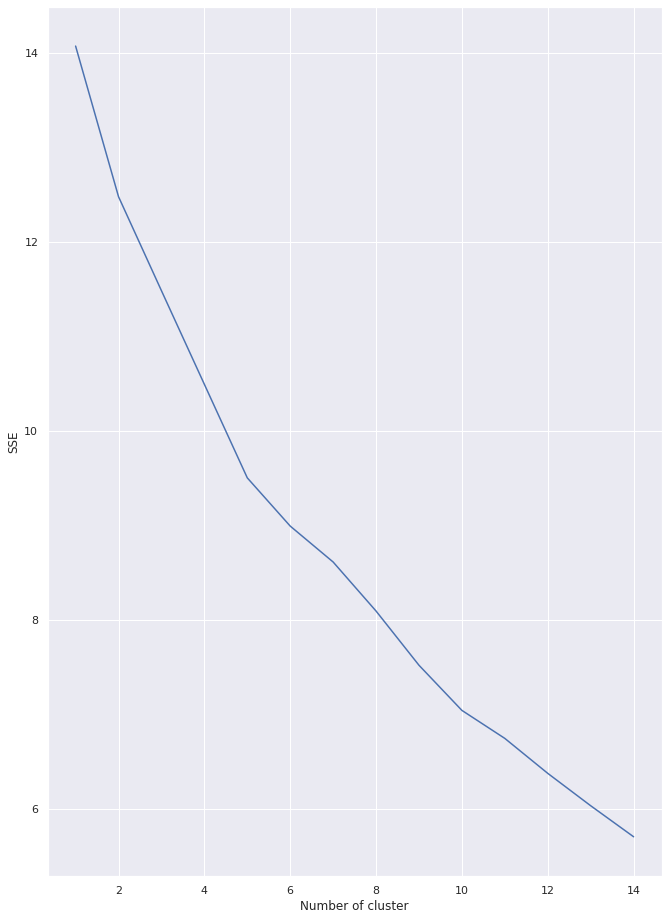

In [42]:
sse = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(bangalore_venues_grouped.drop('Neighborhood',axis=1))
    bangalore_venues_grouped['Cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

### From the above graph, we can see the optimal value for cluster is 5.

In [43]:
kmeans = KMeans(n_clusters=5,random_state=0)

In [44]:
kmeans.fit(bangalore_venues_grouped.drop('Neighborhood',axis=1))

KMeans(n_clusters=5, random_state=0)

In [45]:
bangalore_venues_grouped['Cluster'] = kmeans.labels_

In [46]:
bangalore_venues_grouped.groupby('Cluster')['Neighborhood'].count()

Cluster
0     7
1    25
2     4
3    24
4     3
Name: Neighborhood, dtype: int64

In [47]:
bangalore_venues_grouped.columns

Index(['Neighborhood', 'Venue Category_ATM',
       'Venue Category_Andhra Restaurant', 'Venue Category_Art Museum',
       'Venue Category_Arts & Crafts Store', 'Venue Category_Asian Restaurant',
       'Venue Category_Athletics & Sports', 'Venue Category_Auto Garage',
       'Venue Category_BBQ Joint', 'Venue Category_Badminton Court',
       ...
       'Venue Category_Tea Room', 'Venue Category_Tex-Mex Restaurant',
       'Venue Category_Toll Plaza', 'Venue Category_Train Station',
       'Venue Category_Travel & Transport', 'Venue Category_Udupi Restaurant',
       'Venue Category_Vegetarian / Vegan Restaurant',
       'Venue Category_Vietnamese Restaurant', 'Venue Category_Women's Store',
       'Cluster'],
      dtype='object', length=130)

In [48]:
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(bangalore_venues_grouped,on='Neighborhood')

In [49]:
neighborhoods_venues_sorted.head(4)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Cluster
0,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Supermarket,Venue Category_Fast Food Restaurant,Venue Category_Neighborhood,Venue Category_Mughlai Restaurant,Venue Category_Chinese Restaurant,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1
1,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Chinese Restaurant,Venue Category_Snack Place,Venue Category_Fast Food Restaurant,Venue Category_Ice Cream Shop,Venue Category_Sandwich Place,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Pizza Place,Venue Category_Coffee Shop,...,0.0,0.0,0.0,0.0,0.0,0.0,0.054054,0.0,0.0,1
2,Banashankari,Venue Category_Café,Venue Category_Indian Restaurant,Venue Category_Men's Store,Venue Category_Park,Venue Category_Clothing Store,Venue Category_Shoe Store,Venue Category_Fried Chicken Joint,Venue Category_Breakfast Spot,Venue Category_Pizza Place,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0
3,Banaswadi,Venue Category_Indian Restaurant,Venue Category_Bakery,Venue Category_Juice Bar,Venue Category_Dessert Shop,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Performing Arts Venue,Venue Category_Park,Venue Category_Paintball Field,Venue Category_Outlet Store,...,0.0,0.0,0.0,0.0,0.0,0.0,0.125000,0.0,0.0,3


In [50]:
neighborhoods_venues_sorted.columns
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(bangalore_venues,on='Neighborhood')

In [51]:
# create map
map_clusters = folium.Map(location=[bangalore_latitude, bangalore_longitude], zoom_start=11)

In [52]:
# set color scheme for the clusters
x = np.arange(6)
ys = [i + x + (i*x)**2 for i in range(6)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighborhoods_venues_sorted['Neighborhood Latitude'], neighborhoods_venues_sorted['Neighborhood Longitude'], neighborhoods_venues_sorted['Neighborhood'], neighborhoods_venues_sorted['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       

In [53]:
map_clusters

## Finding similar locations based on user input (recommending location)
#### We need to analyze factors such as population and Income to recommend.

In [54]:
bangalore_income.head()

,Borough,Neighborhoods,AverageIncome
0,Central,Cantonment area,18944.099792
1,Central,Domlur,56837.022198
2,Central,Indiranagar,41991.817435
3,Central,Jeevanbheemanagar,6667.447632
4,Central,Malleswaram,53270.063892


In [55]:
bangalore_population.head()

,Borough,Neighborhoods,Population
0,Central,Cantonment area,866377
1,Central,Domlur,743186
2,Central,Indiranagar,474289
3,Central,Jeevanbheemanagar,527874
4,Central,Malleswaram,893629


In [56]:
bangalore_population['Normalized_population'] = bangalore_population['Population']/bangalore_population['Population'].max(axis=0)
bangalore_population.head()

,Borough,Neighborhoods,Population,Normalized_population
0,Central,Cantonment area,866377,0.880810
1,Central,Domlur,743186,0.755567
2,Central,Indiranagar,474289,0.482190
3,Central,Jeevanbheemanagar,527874,0.536668
4,Central,Malleswaram,893629,0.908516


In [57]:
bangalore_income['Normalized_income'] = bangalore_income['AverageIncome']/bangalore_income['AverageIncome'].max(axis=0)
bangalore_income.head()

,Borough,Neighborhoods,AverageIncome,Normalized_income
0,Central,Cantonment area,18944.099792,0.293051
1,Central,Domlur,56837.022198,0.879225
2,Central,Indiranagar,41991.817435,0.649581
3,Central,Jeevanbheemanagar,6667.447632,0.103140
4,Central,Malleswaram,53270.063892,0.824047


In [58]:
bangalore_venues_grouped.head(1)

,Neighborhood,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,...,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Cluster
0,Arekere,0.0,0.0,0.0,0.0,0.0,0.035714,0.0,0.0,0.035714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


#### recommending Veg restaurants

In [59]:
bangalore_veg = bangalore_venues_onehot.groupby(['Neighborhood']).sum().reset_index()
bangalore_veg.head()

,Neighborhood,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,...,Venue Category_Swiss Restaurant,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store
0,Arekere,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,BTM Layout,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
2,Banashankari,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Banaswadi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Basavanagudi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
bangalore_veg['Venue Category_Vegetarian / Vegan Restaurant']

0     0
1     2
2     0
3     1
4     0
     ..
58    0
59    0
60    0
61    0
62    0
Name: Venue Category_Vegetarian / Vegan Restaurant, Length: 63, dtype: uint8

In [61]:
bangalore_veg = bangalore_veg[['Neighborhood','Venue Category_Vegetarian / Vegan Restaurant']]

In [62]:
bangalore_veg.rename(columns={'Venue Category_Vegetarian / Vegan Restaurant':'NumberOfVegRestaurants'},inplace=True)

In [63]:
bangalore_veg.head()

,Neighborhood,NumberOfVegRestaurants
0,Arekere,0
1,BTM Layout,2
2,Banashankari,0
3,Banaswadi,1
4,Basavanagudi,0


In [64]:
bangalore_veg['NumberOfNonVeganrestaurants'] = 1-(bangalore_veg['NumberOfVegRestaurants']/bangalore_veg['NumberOfVegRestaurants'].max(axis=0))

In [65]:
bangalore_veg.head(10)

,Neighborhood,NumberOfVegRestaurants,NumberOfNonVeganrestaurants
0,Arekere,0,1.0
1,BTM Layout,2,0.0
2,Banashankari,0,1.0
3,Banaswadi,1,0.5
4,Basavanagudi,0,1.0
5,Basaveshwaranagar,0,1.0
6,Begur,0,1.0
7,Bellandur,0,1.0
8,Bommanahalli,0,1.0
9,Bommasandra,0,1.0


In [66]:
bangalore_veg.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)

### Building a target neighborhood by providing a sample restaurant : say ' Whitefield '

In [67]:
target_cluster_dataframe = neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Neighborhood']=='Whitefield']

In [68]:
target_cluster_dataframe.reset_index()

,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,...,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,573,Whitefield,Venue Category_Gym / Fitness Center,Venue Category_Diner,Venue Category_Hotel Bar,Venue Category_Market,Venue Category_Swiss Restaurant,Venue Category_Bakery,Venue Category_Hotel,Venue Category_Café,...,0.0,0.0,1,Eastern,12.9698,77.7499,Golds Gym,12.972217,77.750529,Gym / Fitness Center
1,574,Whitefield,Venue Category_Gym / Fitness Center,Venue Category_Diner,Venue Category_Hotel Bar,Venue Category_Market,Venue Category_Swiss Restaurant,Venue Category_Bakery,Venue Category_Hotel,Venue Category_Café,...,0.0,0.0,1,Eastern,12.9698,77.7499,Herbs and Spices,12.968145,77.750862,Eastern European Restaurant
2,575,Whitefield,Venue Category_Gym / Fitness Center,Venue Category_Diner,Venue Category_Hotel Bar,Venue Category_Market,Venue Category_Swiss Restaurant,Venue Category_Bakery,Venue Category_Hotel,Venue Category_Café,...,0.0,0.0,1,Eastern,12.9698,77.7499,Chef Baker's,12.969730,77.751302,Bakery
3,576,Whitefield,Venue Category_Gym / Fitness Center,Venue Category_Diner,Venue Category_Hotel Bar,Venue Category_Market,Venue Category_Swiss Restaurant,Venue Category_Bakery,Venue Category_Hotel,Venue Category_Café,...,0.0,0.0,1,Eastern,12.9698,77.7499,Royal Orchid Suites,12.966774,77.751262,Hotel
4,577,Whitefield,Venue Category_Gym / Fitness Center,Venue Category_Diner,Venue Category_Hotel Bar,Venue Category_Market,Venue Category_Swiss Restaurant,Venue Category_Bakery,Venue Category_Hotel,Venue Category_Café,...,0.0,0.0,1,Eastern,12.9698,77.7499,The river side bar and kitchen,12.967298,77.749614,Hotel Bar
5,578,Whitefield,Venue Category_Gym / Fitness Center,Venue Category_Diner,Venue Category_Hotel Bar,Venue Category_Market,Venue Category_Swiss Restaurant,Venue Category_Bakery,Venue Category_Hotel,Venue Category_Café,...,0.0,0.0,1,Eastern,12.9698,77.7499,Punjabi Kitchen,12.968100,77.749804,Diner
6,579,Whitefield,Venue Category_Gym / Fitness Center,Venue Category_Diner,Venue Category_Hotel Bar,Venue Category_Market,Venue Category_Swiss Restaurant,Venue Category_Bakery,Venue Category_Hotel,Venue Category_Café,...,0.0,0.0,1,Eastern,12.9698,77.7499,Stoner,12.968464,77.749499,Ice Cream Shop
7,580,Whitefield,Venue Category_Gym / Fitness Center,Venue Category_Diner,Venue Category_Hotel Bar,Venue Category_Market,Venue Category_Swiss Restaurant,Venue Category_Bakery,Venue Category_Hotel,Venue Category_Café,...,0.0,0.0,1,Eastern,12.9698,77.7499,Cult - The Workout Station Whitefield,12.968434,77.749597,Gym / Fitness Center
8,581,Whitefield,Venue Category_Gym / Fitness Center,Venue Category_Diner,Venue Category_Hotel Bar,Venue Category_Market,Venue Category_Swiss Restaurant,Venue Category_Bakery,Venue Category_Hotel,Venue Category_Café,...,0.0,0.0,1,Eastern,12.9698,77.7499,Cheenavala,12.966435,77.749368,Kerala Restaurant
9,582,Whitefield,Venue Category_Gym / Fitness Center,Venue Category_Diner,Venue Category_Hotel Bar,Venue Category_Market,Venue Category_Swiss Restaurant,Venue Category_Bakery,Venue Category_Hotel,Venue Category_Café,...,0.0,0.0,1,Eastern,12.9698,77.7499,Fabindia,12.972156,77.750447,Market


In [69]:
target_cluster = target_cluster_dataframe.iloc[0].at['Cluster']

In [70]:
target_cluster

1

In [71]:
print("The target cluster is : ",target_cluster)

The target cluster is :  1


In [72]:
possible_neighborhoods = neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster']==target_cluster]
possible_neighborhoods.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Supermarket,Venue Category_Fast Food Restaurant,Venue Category_Neighborhood,Venue Category_Mughlai Restaurant,Venue Category_Chinese Restaurant,...,0.0,0.0,1,SouthernSuburbs,12.8875,77.597,Decathlon Sports India Pvt Ltd,12.887513,77.597712,Sporting Goods Shop
1,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Supermarket,Venue Category_Fast Food Restaurant,Venue Category_Neighborhood,Venue Category_Mughlai Restaurant,Venue Category_Chinese Restaurant,...,0.0,0.0,1,SouthernSuburbs,12.8875,77.597,Zhangs Dynasty,12.889923,77.597804,Chinese Restaurant
2,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Supermarket,Venue Category_Fast Food Restaurant,Venue Category_Neighborhood,Venue Category_Mughlai Restaurant,Venue Category_Chinese Restaurant,...,0.0,0.0,1,SouthernSuburbs,12.8875,77.597,Guru Garden,12.891196,77.597979,Indian Restaurant
3,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Supermarket,Venue Category_Fast Food Restaurant,Venue Category_Neighborhood,Venue Category_Mughlai Restaurant,Venue Category_Chinese Restaurant,...,0.0,0.0,1,SouthernSuburbs,12.8875,77.597,Kababis,12.889605,77.597557,Indian Restaurant
4,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Supermarket,Venue Category_Fast Food Restaurant,Venue Category_Neighborhood,Venue Category_Mughlai Restaurant,Venue Category_Chinese Restaurant,...,0.0,0.0,1,SouthernSuburbs,12.8875,77.597,Madhuloka Liquor Boutique,12.890243,77.597734,Liquor Store


In [73]:
print("There are {} neighborhoods which has similar characteristics to Whitefield.".format(possible_neighborhoods.shape[0]))

There are 327 neighborhoods which has similar characteristics to Whitefield.


In [74]:
possible_neighborhoods.reset_index().head()

,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,...,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,0,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Supermarket,Venue Category_Fast Food Restaurant,Venue Category_Neighborhood,Venue Category_Mughlai Restaurant,...,0.0,0.0,1,SouthernSuburbs,12.8875,77.597,Decathlon Sports India Pvt Ltd,12.887513,77.597712,Sporting Goods Shop
1,1,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Supermarket,Venue Category_Fast Food Restaurant,Venue Category_Neighborhood,Venue Category_Mughlai Restaurant,...,0.0,0.0,1,SouthernSuburbs,12.8875,77.597,Zhangs Dynasty,12.889923,77.597804,Chinese Restaurant
2,2,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Supermarket,Venue Category_Fast Food Restaurant,Venue Category_Neighborhood,Venue Category_Mughlai Restaurant,...,0.0,0.0,1,SouthernSuburbs,12.8875,77.597,Guru Garden,12.891196,77.597979,Indian Restaurant
3,3,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Supermarket,Venue Category_Fast Food Restaurant,Venue Category_Neighborhood,Venue Category_Mughlai Restaurant,...,0.0,0.0,1,SouthernSuburbs,12.8875,77.597,Kababis,12.889605,77.597557,Indian Restaurant
4,4,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Supermarket,Venue Category_Fast Food Restaurant,Venue Category_Neighborhood,Venue Category_Mughlai Restaurant,...,0.0,0.0,1,SouthernSuburbs,12.8875,77.597,Madhuloka Liquor Boutique,12.890243,77.597734,Liquor Store


In [75]:
possible_neighborhoods.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)

/tmp/ipykernel_2804/3801531037.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  possible_neighborhoods.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)


### Now we need to create ranking by combining population and income factors as well?

In [76]:
possible_neighborhoods = possible_neighborhoods.merge(bangalore_population[['Neighborhoods','Population','Normalized_population']],on='Neighborhoods')
possible_neighborhoods = possible_neighborhoods.merge(bangalore_income[['Neighborhoods','AverageIncome','Normalized_income']],on='Neighborhoods')
possible_neighborhoods = possible_neighborhoods.merge(bangalore_veg[['Neighborhoods','NumberOfVegRestaurants','NumberOfNonVeganrestaurants']],on='Neighborhoods')

In [77]:
possible_neighborhoods.head()

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue,Venue Latitude,Venue Longitude,Venue Category,Population,Normalized_population,AverageIncome,Normalized_income,NumberOfVegRestaurants,NumberOfNonVeganrestaurants
0,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Supermarket,Venue Category_Fast Food Restaurant,Venue Category_Neighborhood,Venue Category_Mughlai Restaurant,Venue Category_Chinese Restaurant,...,Decathlon Sports India Pvt Ltd,12.887513,77.597712,Sporting Goods Shop,138760,0.141072,29378.716626,0.454466,0,1.0
1,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Supermarket,Venue Category_Fast Food Restaurant,Venue Category_Neighborhood,Venue Category_Mughlai Restaurant,Venue Category_Chinese Restaurant,...,Zhangs Dynasty,12.889923,77.597804,Chinese Restaurant,138760,0.141072,29378.716626,0.454466,0,1.0
2,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Supermarket,Venue Category_Fast Food Restaurant,Venue Category_Neighborhood,Venue Category_Mughlai Restaurant,Venue Category_Chinese Restaurant,...,Guru Garden,12.891196,77.597979,Indian Restaurant,138760,0.141072,29378.716626,0.454466,0,1.0
3,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Supermarket,Venue Category_Fast Food Restaurant,Venue Category_Neighborhood,Venue Category_Mughlai Restaurant,Venue Category_Chinese Restaurant,...,Kababis,12.889605,77.597557,Indian Restaurant,138760,0.141072,29378.716626,0.454466,0,1.0
4,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Supermarket,Venue Category_Fast Food Restaurant,Venue Category_Neighborhood,Venue Category_Mughlai Restaurant,Venue Category_Chinese Restaurant,...,Madhuloka Liquor Boutique,12.890243,77.597734,Liquor Store,138760,0.141072,29378.716626,0.454466,0,1.0


In [78]:
possible_neighborhoods['Ranking'] = possible_neighborhoods['Normalized_population'] * 0.5 + possible_neighborhoods['Normalized_income'] * 0.35 + possible_neighborhoods['NumberOfNonVeganrestaurants'] * 0.1
recommended_neighborhoods = possible_neighborhoods.sort_values(by='Ranking',ascending=False)
recommended_neighborhoods.reset_index(inplace=True, drop=True)

In [79]:
recommended_neighborhoods.head()

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Latitude,Venue Longitude,Venue Category,Population,Normalized_population,AverageIncome,Normalized_income,NumberOfVegRestaurants,NumberOfNonVeganrestaurants,Ranking
0,Rajajinagar,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Park,Venue Category_Fast Food Restaurant,Venue Category_Snack Place,Venue Category_Breakfast Spot,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Juice Bar,Venue Category_Mobile Phone Shop,...,12.988246,77.549355,Fast Food Restaurant,981362,0.99771,60967.535874,0.943121,1,0.5,0.878947
1,Rajajinagar,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Park,Venue Category_Fast Food Restaurant,Venue Category_Snack Place,Venue Category_Breakfast Spot,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Juice Bar,Venue Category_Mobile Phone Shop,...,12.987441,77.549826,Bakery,981362,0.99771,60967.535874,0.943121,1,0.5,0.878947
2,Rajajinagar,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Park,Venue Category_Fast Food Restaurant,Venue Category_Snack Place,Venue Category_Breakfast Spot,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Juice Bar,Venue Category_Mobile Phone Shop,...,12.985978,77.554241,Breakfast Spot,981362,0.99771,60967.535874,0.943121,1,0.5,0.878947
3,Rajajinagar,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Park,Venue Category_Fast Food Restaurant,Venue Category_Snack Place,Venue Category_Breakfast Spot,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Juice Bar,Venue Category_Mobile Phone Shop,...,12.993448,77.550643,Park,981362,0.99771,60967.535874,0.943121,1,0.5,0.878947
4,Rajajinagar,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Park,Venue Category_Fast Food Restaurant,Venue Category_Snack Place,Venue Category_Breakfast Spot,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Juice Bar,Venue Category_Mobile Phone Shop,...,12.987432,77.549813,Snack Place,981362,0.99771,60967.535874,0.943121,1,0.5,0.878947


In [80]:
top3 = recommended_neighborhoods.groupby(['Neighborhoods','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue'])['Ranking'].unique()

In [80]:
top3_df = pd.DataFrame(top3).reset_index()

In [81]:
top3_df.head(3)

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Ranking
0,Begur,Venue Category_Bakery,Venue Category_Indian Sweet Shop,Venue Category_Stadium,[0.7361321887351776]
1,Hulimavu,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Badminton Court,[0.7638135476902764]
2,Kamakshipalya,Venue Category_South Indian Restaurant,Venue Category_Yoga Studio,Venue Category_Food Truck,[0.80418735993893]


#### Here, according the data, we see that 'Begur,Hulimavu and kamakshipalya' are top 3 neighborhoods to find similar food to whitefield restaurant's veg food !
#### Here our model will recommend these neighborneeds and top 3 common venues to visit.

# Thank you for reviewing !